In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("Non_linear_SVM_Dataset.csv")
df

X1        X2    Y
0    0.830858 -0.334342  1.0
1    0.991710  0.879000  0.0
2    1.107245 -0.470344  1.0
3   -0.140899  1.033148  0.0
4    0.405592  1.328529  0.0
..        ...       ...  ...
495  0.265123  1.023197  0.0
496  0.193576 -0.011663  1.0
497  0.345548 -0.128434  1.0
498  1.403890 -0.466993  1.0
499  0.075594  1.375965  0.0

[500 rows x 3 columns]

In [ ]:
Y = df["Y"]
X = df.iloc[:,0:2]
X.head()

X1        X2
0  0.830858 -0.334342
1  0.991710  0.879000
2  1.107245 -0.470344
3 -0.140899  1.033148
4  0.405592  1.328529

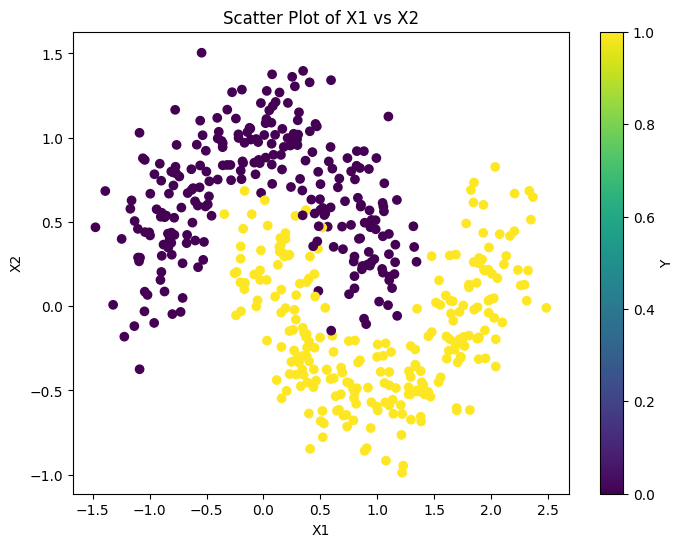

In [ ]:
# prompt: construct a scatter plot in between X1 and X2 and Y variable with 2D visualization

import matplotlib.pyplot as plt

# Assuming X1 and X2 are the first two columns of X
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap='viridis')  # Use Y for color mapping
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter Plot of X1 vs X2")
plt.colorbar(label="Y") # Show colorbar to represent values in Y
plt.show()


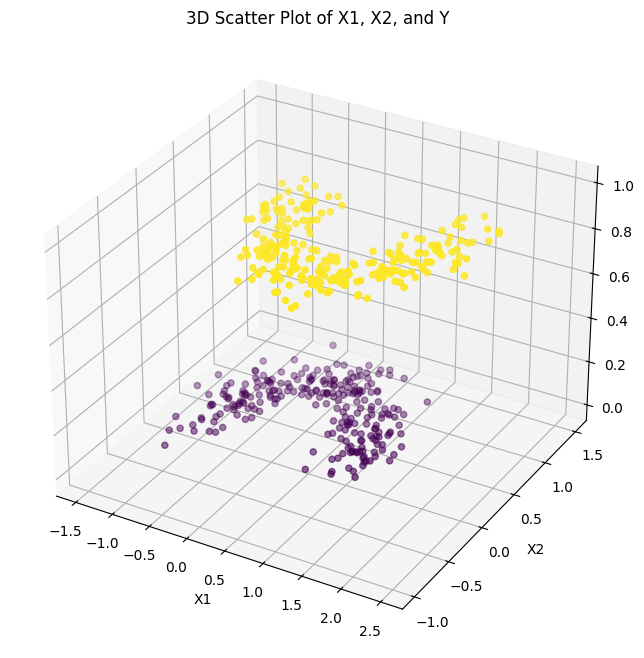

In [ ]:
# prompt: construct a scatter plot in between X1 and X2 and Y variable with 3 D visualization

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['X1'], X['X2'], Y, c=Y, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot of X1, X2, and Y')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test    = train_test_split(X, Y, test_size=0.3)

In [ ]:
# Linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.84
Test score: 0.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


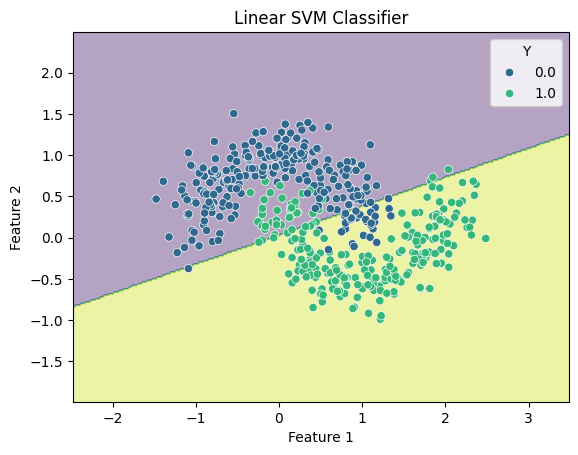

In [ ]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


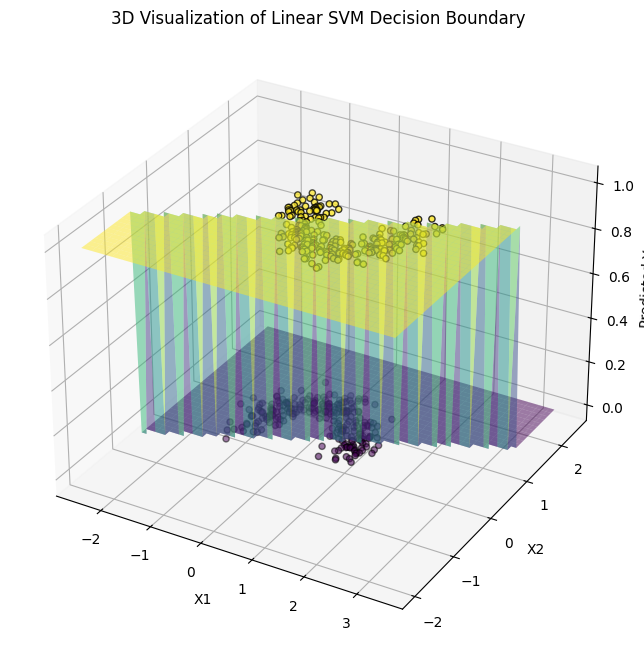

In [ ]:
# prompt: show me the same graph in 3D by plotting linear model

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['X1'], X['X2'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of Linear SVM Decision Boundary')

plt.show()


In [ ]:
# Polynomial classifier
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=3)   # degree = 2,3,4
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.89
Test score: 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


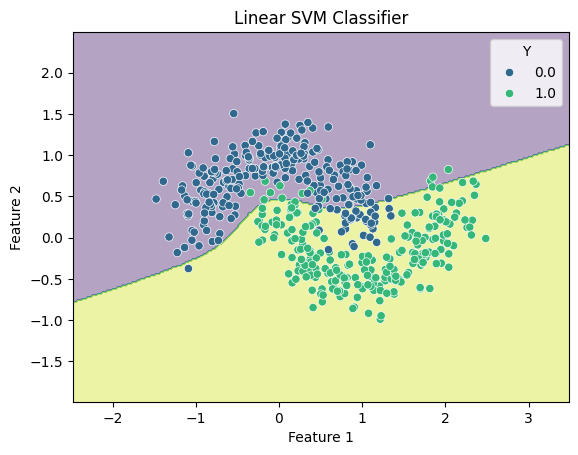

In [ ]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


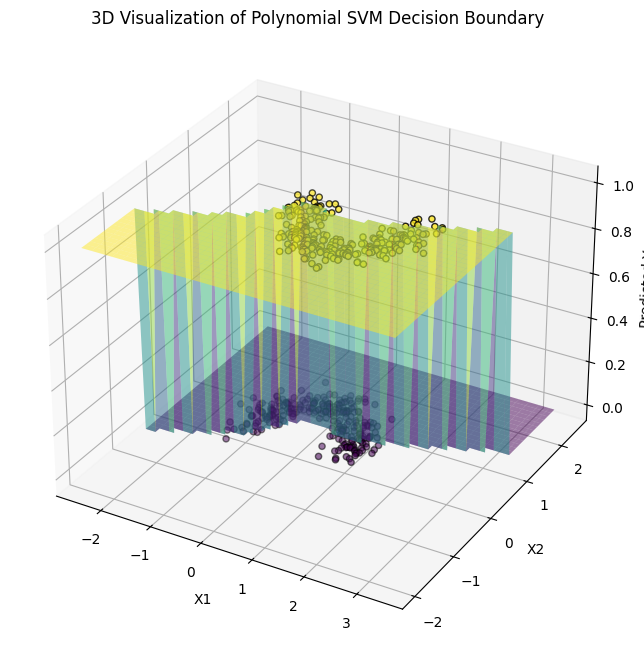

In [ ]:
# prompt: show me the ploynomial model by 3D graph

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['X1'], X['X2'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of Polynomial SVM Decision Boundary')

plt.show()


In [ ]:
# Radial basis classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.98
Test score: 0.95


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


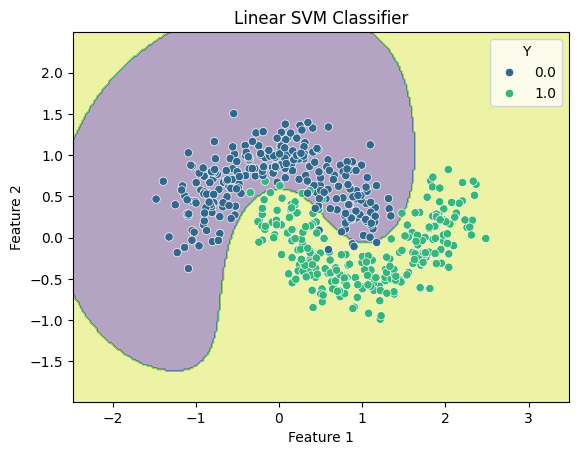

In [ ]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


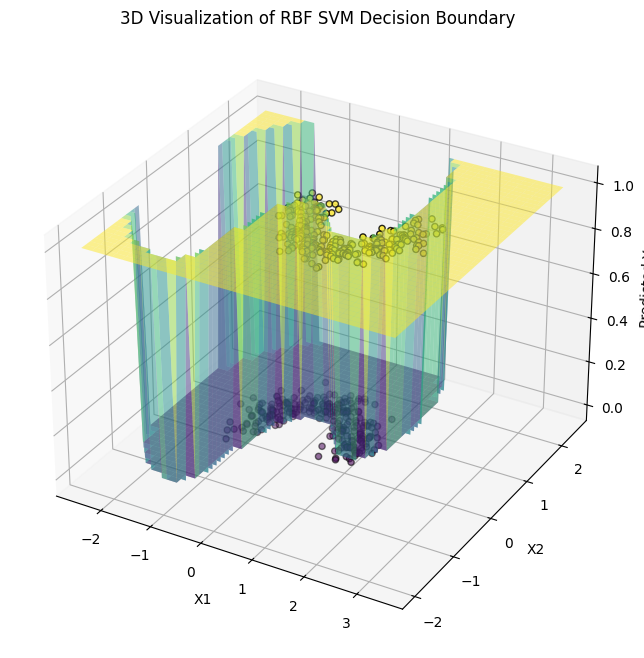

In [ ]:
# prompt: show me the rbf graph in 3D

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['X1'], X['X2'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of RBF SVM Decision Boundary')

plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate a synthetic non-linear dataset with 5 continuous variables
df = pd.read_csv("Pharma_Industry.csv")
df.shape

# Convert to DataFrame for reference
X = df.iloc[:,0:3]
y = df["Drug Response"]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0)

# Train and evaluate SVM with linear kernel
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train and evaluate SVM with polynomial kernel
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Train and evaluate SVM with RBF kernel
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Display results
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(f"Polynomial SVM Accuracy: {accuracy_poly:.2f}")
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")


'''
%matplotlib qt
plot_3d_decision_boundary_fixed(svm_linear, X_train.values, y_train, "3D Decision Boundary - Linear SVM")

%matplotlib qt
plot_3d_decision_boundary_fixed(svm_poly, X_train.values, y_train, "3D Decision Boundary - Linear SVM")

%matplotlib qt
plot_3d_decision_boundary_fixed(svm_rbf, X_train.values, y_train, "3D Decision Boundary - Linear SVM")
'''
#===========================================================================
# Step 5: Apply PCA (Reduce to 3D for Visualization)
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Train SVM Models on 3D Transformed Data
svm_linear_3d = SVC(kernel='linear', C=1.0)
svm_linear_3d.fit(X_pca_3d, y)

svm_poly_3d = SVC(kernel='poly', degree=3, C=1.0)
svm_poly_3d.fit(X_pca_3d, y)

svm_rbf_3d = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf_3d.fit(X_pca_3d, y)


# Step 6: Function to Plot 3D Decision Boundaries
def plot_3d_decision_boundary_fixed(model, X, y, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of data points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolor='k')

    # Create a triangulation of the feature space
    tri = Delaunay(X[:, :2])

    # Predict values for the 3D surface
    Z = model.decision_function(X)

    # Create surface plot
    ax.plot_trisurf(X[:, 0], X[:, 1], Z, triangles=tri.simplices, cmap='coolwarm', alpha=0.3)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Decision Boundary')
    ax.set_title(title)

    plt.show()




Linear SVM Accuracy: 0.59
Polynomial SVM Accuracy: 0.58
RBF SVM Accuracy: 0.61


In [7]:
df = pd.read_csv("Pharma_Industry.csv")
df.head()

Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1